In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

country_names = ["argentina","brazil","britain","canada","colombia","egypt","france","germany","indonesia","iran","italy","japan","malaysia","mexico","peru","philippines","poland","russia","south_africa","south_korea","spain","thailand","turkey","ukraine","united_states","uzbekistan"]

#df = pd.DataFrame(0, index=country_names, columns=['covid_deaths_per_100k', 'excess_deaths_per_100k'])
#df.index.name = "country_name"

df = pd.DataFrame(0, index=np.arange(len(country_names)), columns=['Country','covid_deaths_per_100k', 'excess_deaths_per_100k'])
for i in range(len(country_names)):
    data = pd.read_csv("%s_excess_deaths.csv"%country_names[i])
    if country_names[i] == "united_states":
        data = data[data.region == "United States"]
        
    df['Country'][i] = country_names[i]
    df['covid_deaths_per_100k'][i] = data[data.year == 2020].covid_deaths_per_100k.sum()
    df['excess_deaths_per_100k'][i] = data[data.year == 2020].excess_deaths_per_100k.sum()


#for consistency with the other data, "britan" is changed to United Kingdom and all countries are capitalized.
country_names_status = ["Argentina","Brazil","United Kingdom","Canada","Colombia","Egypt","France","Germany","Indonesia","Iran","Italy","Japan","Malaysia","Mexico","Peru","Philippines","Poland","Russia","South Africa","South Korea","Spain","Thailand","Turkey","Ukraine","United States","Uzbekistan"]
df["Country"] = country_names_status

df

<ipython-input-32-bb68a4382284>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['covid_deaths_per_100k'][i] = data[data.year == 2020].covid_deaths_per_100k.sum()
<ipython-input-32-bb68a4382284>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['excess_deaths_per_100k'][i] = data[data.year == 2020].excess_deaths_per_100k.sum()
<ipython-input-32-bb68a4382284>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'][i] = co

<ipython-input-32-bb68a4382284>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['excess_deaths_per_100k'][i] = data[data.year == 2020].excess_deaths_per_100k.sum()
<ipython-input-32-bb68a4382284>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'][i] = country_names[i]
<ipython-input-32-bb68a4382284>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['covid_deaths_per_100k'][i] = data[data.year == 2020].covid_deaths_

,Country,covid_deaths_per_100k,excess_deaths_per_100k
0,Argentina,94,91
1,Brazil,91,98
2,United Kingdom,110,124
3,Canada,42,43
4,Colombia,85,99
5,Egypt,7,100
6,France,96,80
7,Germany,41,48
8,Indonesia,4,41
9,Iran,65,138


In [33]:
#for consistency in data, United Kingdom is placed where it should be alphabetically
df = df.sort_values('Country')

In [34]:
data_status = pd.read_excel("Country_and_Territory_Ratings_and_Statuses_FIW1973-2021.xlsx", sheet_name = 1, header = 2)
#Status: PF: partly free, F: free, NF: not free #PR: political rights, CL: civil liberty
data_status.columns #PR.47', 'CL.11', 'Status.47'

#extract 2020 data and countries
data_status = data_status[['Unnamed: 0','PR.47', 'CL.11', 'Status.47']] 
data_status.rename(columns = {'Unnamed: 0': 'Country','PR.47':'PR','CL.11':'CL','Status.47':'Status'}, inplace = True)#,"PR.47":"PR.2020","CL.11":"CL.2020", "Status.47" : "Status.2020"})

#countries filtered 
country_names_status = ["Argentina","Brazil","United Kingdom","Canada","Colombia","Egypt","France","Germany","Indonesia","Iran","Italy","Japan","Malaysia","Mexico","Peru","Philippines","Poland","Russia","South Africa","South Korea","Spain","Thailand","Turkey","Ukraine","United States","Uzbekistan"]
data_status = data_status[data_status["Country"].isin(country_names_status)]
data_status = data_status.sort_values('Country')


data_status.reset_index(drop = True)

,Country,PR,CL,Status
0,Argentina,2,2,F
1,Brazil,2,3,F
2,Canada,1,1,F
3,Colombia,3,3,PF
4,Egypt,6,6,NF
5,France,1,2,F
6,Germany,1,1,F
7,Indonesia,2,4,PF
8,Iran,6,6,NF
9,Italy,1,1,F


In [35]:
#lets merge it!
data_merged = df.merge(data_status[['Country','PR','CL','Status']])
data_merged

,Country,covid_deaths_per_100k,excess_deaths_per_100k,PR,CL,Status
0,Argentina,94,91,2,2,F
1,Brazil,91,98,2,3,F
2,Canada,42,43,1,1,F
3,Colombia,85,99,3,3,PF
4,Egypt,7,100,6,6,NF
5,France,96,80,1,2,F
6,Germany,41,48,1,1,F
7,Indonesia,4,41,2,4,PF
8,Iran,65,138,6,6,NF
9,Italy,124,182,1,1,F


In [36]:
#get HDI data
data_hdi = pd.read_csv("Human Development Index (HDI).csv", header = 5)
data_hdi = data_hdi[['Country','2019']]

#filter countries, whitespace before the countries need to be removed. -gescheitert -> the whitespace put in the string manually
country_names_hdi_with_whitespace = [" Argentina"," Brazil"," United Kingdom"," Canada"," Colombia"," Egypt"," France"," Germany"," Indonesia"," Iran (Islamic Republic of)"," Italy"," Japan"," Malaysia"," Mexico"," Peru"," Philippines"," Poland"," Russian Federation"," South Africa"," South Korea"," Spain"," Thailand"," Turkey"," Ukraine"," United States"," Uzbekistan"]

data_hdi = data_hdi[data_hdi["Country"].isin(country_names_hdi_with_whitespace)]

#the data from south korea is missing, the sub-nationala HDI from 2019 found on: https://globaldatalab.org/shdi/shdi/KOR/?levels=1%2B4&interpolation=1&extrapolation=0&nearest_real=0&years=2019
data_south_korea_hdi = pd.Series(data = {
    'Country':'South Korea',
    '2019': '0.916'
})
data_hdi = data_hdi.append(data_south_korea_hdi,ignore_index=True)

#rename countries sothat it correponds to the other dataframes. 
country_names_hdi = ["Argentina","Brazil","Canada","Colombia","Egypt","France","Germany","Indonesia","Iran","Italy","Japan","Malaysia","Mexico","Peru","Philippines","Poland","Russia","South Africa","Spain","Thailand","Turkey","Ukraine","United Kingdom","United States","Uzbekistan","South Korea"]
data_hdi["Country"] = country_names_hdi

data_hdi = data_hdi.sort_values('Country')

data_hdi.rename(columns = {'2019': 'HDI_2019'}, inplace = True)
data_hdi.reset_index(drop = True)

,Country,HDI_2019
0,Argentina,0.845
1,Brazil,0.765
2,Canada,0.929
3,Colombia,0.767
4,Egypt,0.707
5,France,0.901
6,Germany,0.947
7,Indonesia,0.718
8,Iran,0.783
9,Italy,0.892


In [37]:
#merge it again!
data_merged_final = data_merged.merge(data_hdi[['Country','HDI_2019']])
data_merged_final

#save as a csv file
#data_merged_final.to_csv("output_excess-death_poilical-status_hdi.csv")

,Country,covid_deaths_per_100k,excess_deaths_per_100k,PR,CL,Status,HDI_2019
0,Argentina,94,91,2,2,F,0.845
1,Brazil,91,98,2,3,F,0.765
2,Canada,42,43,1,1,F,0.929
3,Colombia,85,99,3,3,PF,0.767
4,Egypt,7,100,6,6,NF,0.707
5,France,96,80,1,2,F,0.901
6,Germany,41,48,1,1,F,0.947
7,Indonesia,4,41,2,4,PF,0.718
8,Iran,65,138,6,6,NF,0.783
9,Italy,124,182,1,1,F,0.892


In [38]:
#check data
data = pd.read_csv("united_states_excess_deaths.csv")
data = data[data.region == "United States"]
data = data[data.year == 2020]
data1 = data.covid_deaths_per_100k.sum()
print(data1)
data2 = data.excess_deaths_per_100k.sum()
print(data2)
data

110.09119741208835
159.18133094491193


,country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
5197,United States,United States,USA,2019-12-29,2020-01-04,7,2020,1,328300544,60180,0,61602.278195,-1422.278195,60180,0.000000,-0.433224,-0.023088
5198,United States,United States,USA,2020-01-05,2020-01-11,7,2020,2,328300544,60737,0,62396.028195,-1659.028195,60737,0.000000,-0.505338,-0.026589
5199,United States,United States,USA,2020-01-12,2020-01-18,7,2020,3,328300544,59366,0,60883.778195,-1517.778195,59366,0.000000,-0.462314,-0.024929
5200,United States,United States,USA,2020-01-19,2020-01-25,7,2020,4,328300544,59164,1,59962.028195,-798.028195,59163,0.000305,-0.243079,-0.013309
5201,United States,United States,USA,2020-01-26,2020-02-01,7,2020,5,328300544,58835,0,59581.278195,-746.278195,58835,0.000000,-0.227316,-0.012525
5202,United States,United States,USA,2020-02-02,2020-02-08,7,2020,6,328300544,59484,1,60023.028195,-539.028195,59483,0.000305,-0.164187,-0.008980
5203,United States,United States,USA,2020-02-09,2020-02-15,7,2020,7,328300544,58818,0,59254.028195,-436.028195,58818,0.000000,-0.132814,-0.007359
5204,United States,United States,USA,2020-02-16,2020-02-22,7,2020,8,328300544,58915,1,58730.528195,184.471805,58914,0.000305,0.056190,0.003141
5205,United States,United States,USA,2020-02-23,2020-02-29,7,2020,9,328300544,59335,1,58287.528195,1047.471805,59334,0.000305,0.319059,0.017971
5206,United States,United States,USA,2020-03-01,2020-03-07,7,2020,10,328300544,59699,20,58347.704261,1351.295739,59679,0.006092,0.411603,0.023159


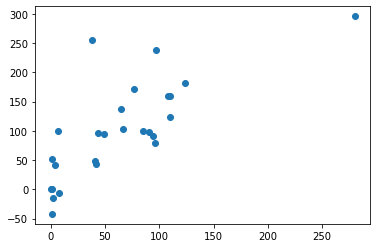

In [39]:
plt.scatter(data_merged_final["covid_deaths_per_100k"],data_merged_final["excess_deaths_per_100k"])

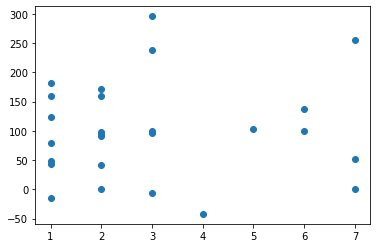

In [40]:
plt.scatter(data_merged_final["PR"],data_merged_final["excess_deaths_per_100k"])

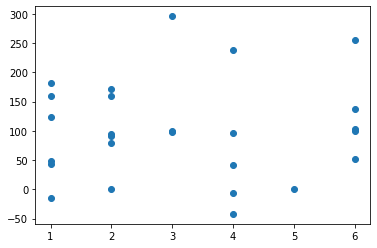

In [41]:
plt.scatter(data_merged_final["CL"],data_merged_final["excess_deaths_per_100k"])

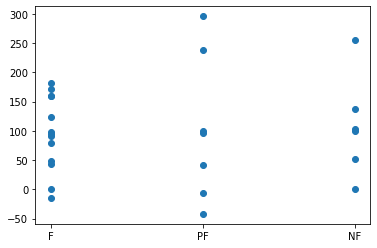

In [42]:
plt.scatter(data_merged_final["Status"],data_merged_final["excess_deaths_per_100k"])

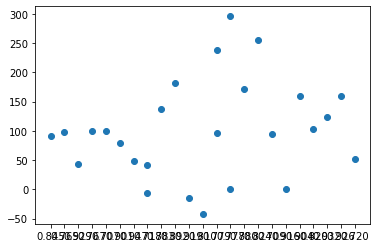

In [43]:
plt.scatter(data_merged_final["HDI_2019"],data_merged_final["excess_deaths_per_100k"])